In [1]:
import glob
import datetime
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap, cm, addcyclic
import matplotlib.dates as mdates
% matplotlib inline

In [2]:
mesh=nc.Dataset('/mnt/storage0/xhu/ANHA4-I/mesh_mask_anha4_201509.nc')
e1t= mesh.variables['e1t'][0,400:,:]  # dx
e2t= mesh.variables['e2t'][0,400:,:]  # dy 
e3t= mesh.variables['e3t'][0,:,400:,:]
tmask= mesh.variables['tmask'][0,:,400:,:]
dep = mesh.variables['gdept_0'][0.,:]

In [19]:
files = nc.Dataset('/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_y2010m01d05_gridU.nc')
u = files.variables['vozocrtx'][0,0,400:,:]
uw = files.variables['sozotaux'][0,400:,:]
files = nc.Dataset('/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_y2010m01d05_gridV.nc')
v = files.variables['vomecrty'][0,0,400:,:]
vw = files.variables['sometauy'][0,400:,:]

(0, 544)

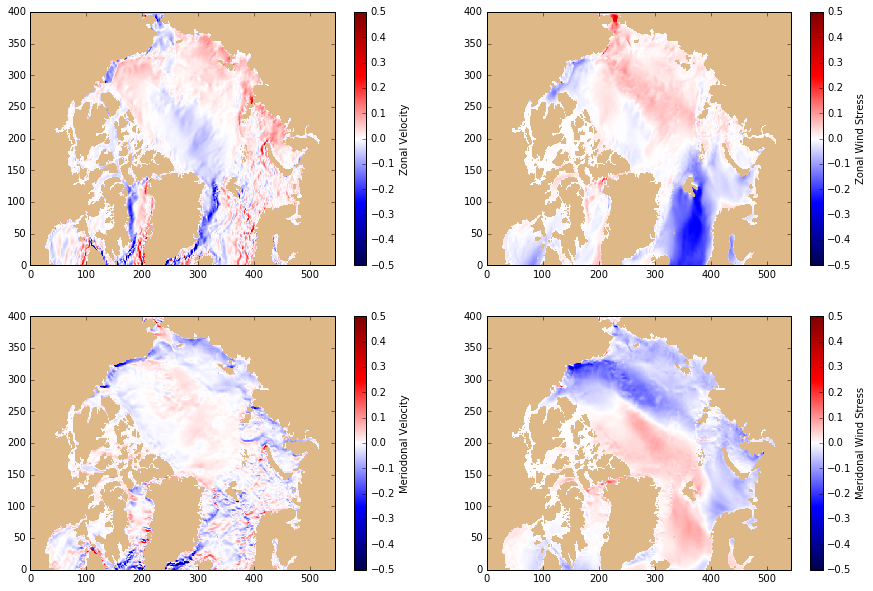

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
cmap = plt.get_cmap('seismic')
cmap.set_bad('burlywood')
# minimum_log_level = 10**(-5)
# maximum_scale_level = 10**(2)
# norm = colors.LogNorm(vmin=minimum_log_level,
#                                  vmax=maximum_scale_level)
#clines = ax.contour(E,0.0,colors='white')
mesh = ax[0,0].pcolormesh(v[:,:],cmap=cmap,vmin=-0.5, vmax=0.5)
                     #norm=norm,)

cbar = fig.colorbar(mesh,ax=ax[0,0])
                    #ticks=[10e-5,10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3],ax=ax,format='%.1e')
cbar.set_label('Zonal Velocity')

mesh = ax[0,1].pcolormesh(vw[:,:],cmap=cmap,vmin=-0.5, vmax=0.5)
                     #norm=norm,)

cbar = fig.colorbar(mesh,ax=ax[0,1])
                    #ticks=[10e-5,10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3],ax=ax,format='%.1e')
cbar.set_label('Zonal Wind Stress')


mesh = ax[1,0].pcolormesh(u[:,:],cmap=cmap,vmin=-0.5, vmax=0.5)
                     #norm=norm,)

cbar = fig.colorbar(mesh,ax=ax[1,0])
                    #ticks=[10e-5,10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3],ax=ax,format='%.1e')
cbar.set_label('Meriodonal Velocity')
mesh = ax[1,1].pcolormesh(uw[:,:],cmap=cmap,vmin=-0.5, vmax=0.5)
                     #norm=norm,)

cbar = fig.colorbar(mesh,ax=ax[1,1])
                    #ticks=[10e-5,10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3],ax=ax,format='%.1e')
cbar.set_label('Meridonal Wind Stress')
ax[0,0].set_xlim([0,544])
ax[0,1].set_xlim([0,544])
ax[1,0].set_xlim([0,544])
ax[1,1].set_xlim([0,544])